In [1]:
#import pandas as pd
#import json
import networkx as nx

In [2]:
import sys
sys.path.append("../pysad")
#import pysad
#import pysad.utils
import pysad.exploration
import pysad.synthesis
import pysad.graph
from pysad.NodeInfo import SynthNodeInfo

In [3]:
sys.path.append("../littleballoffur")

In [4]:
from littleballoffur.dataset import GraphReader

In [5]:
import test_module

# Creating the graph

In [84]:
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)
importlib.reload(test_module)

<module 'test_module' from '/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py'>

In [7]:
data_path = '../synthesis/'


In [101]:
graph_type = 'BA'
if graph_type == 'BA':
    graphname = 'Barabasi-Albert graph'
    nodes = 50000
    edges_per_node = 5
    G = nx.barabasi_albert_graph(nodes, edges_per_node)
elif graph_type == 'ER':
    graphname = 'Erdos-Renyi graph'
    nb_nodes = 50000
    nb_edges = 500000
    G = nx.gnm_random_graph(nb_nodes, nb_edges)
elif graph_type == 'real':
    graphname = 'real network (Facebook)'
    reader = GraphReader("facebook")
    G = reader.get_graph()
else:
    raise ValueError('Unknow graph type.')
graph_handle = pysad.synthesis.SyntheticNetwork(G)
G.graph['name'] = graphname
if not nx.is_connected(G):
    print('Warning, the graph is not connected.')

In [102]:
print('Graph info')
print('----------')
print('graph type:',G.graph['name'])
print('nb of nodes:',G.number_of_nodes(),', nb of edges:',G.number_of_edges())
# print('Diameter:', nx.diameter(G))

Graph info
----------
graph type: Barabasi-Albert graph
nb of nodes: 50000 , nb of edges: 249975


## Statistics of propagation

In [103]:
import numpy as np
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)

<module 'pysad.synthesis' from '../pysad/pysad/synthesis.py'>

In [104]:
number_of_nodes = int(0.1*G.number_of_nodes())
print('Number of nodes chosen for the subgraph:', number_of_nodes)

Number of nodes chosen for the subgraph: 5000


In [110]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 1, 'exploration_depth' : 8,
            'initial_node' : None, 'random_subset_size' : 0.25, 'balltype' : 'spikyball',
         'number_of_nodes' : number_of_nodes}
node_spiky,graph_spiky = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_spiky = dict(graph_spiky.degree()) #G.degree(node_spiky.keys()))
print('subgraph: nb of nodes:',graph_spiky.number_of_nodes(),', edges:',graph_spiky.number_of_edges())

-- experiment 0 --
Initial node 20236
new edges: 12 subset: 3 in_edges: 0
new edges: 32 subset: 8 in_edges: 3
new edges: 150 subset: 38 in_edges: 8
new edges: 1154 subset: 288 in_edges: 39
new edges: 6828 subset: 1707 in_edges: 377
new edges: 32589 subset: 8147 in_edges: 4502
-- max nb of nodes reached in iteration 6 --
new edges: 38002 subset: 9500 in_edges: 10115
subgraph: nb of nodes: 5000 , edges: 11883


In [106]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 1, 'exploration_depth' : 8,
            'initial_node' : None, 'random_subset_size' : 0.25, 'balltype' : 'fireball',
         'number_of_nodes' : number_of_nodes}
node_fire, graph_fire = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_fire = dict(graph_fire.degree()) #dict(G.degree(node_fire.keys()))
#print('subgraph: nb of nodes:',len(degree_fire))
print('subgraph: nb of nodes:',graph_fire.number_of_nodes(),', edges:',graph_fire.number_of_edges())

-- experiment 0 --
Initial node 20236
new edges: 12 subset: 3 in_edges: 0
new edges: 32 subset: 8 in_edges: 3
new edges: 135 subset: 34 in_edges: 8
new edges: 1432 subset: 358 in_edges: 36
new edges: 10596 subset: 2649 in_edges: 585
new edges: 44261 subset: 11065 in_edges: 7981
-- max nb of nodes reached in iteration 6 --
new edges: 26746 subset: 6686 in_edges: 7714
subgraph: nb of nodes: 5000 , edges: 12953


In [107]:
graph_handle.rules['min_degree'] = 1
params_snowball = {'nb_iter' : 1, 'exploration_depth' : 6,
            'initial_node' : None, 'random_subset_size' : 1, 'balltype' : 'spikyball',
         'number_of_nodes' : number_of_nodes}
node_snowball, graph_snowball = test_module.ball_test(graph_handle,params_snowball)
# dictionary with each node as key and its degree as value
degree_snowball = dict(graph_snowball.degree()) #dict(G.degree(node_snowball.keys()))
print('subgraph: nb of nodes:',len(degree_snowball))

-- experiment 0 --
Initial node 27083
new edges: 5 subset: 5 in_edges: 0
new edges: 88 subset: 88 in_edges: 5
new edges: 2475 subset: 2475 in_edges: 100
new edges: 43863 subset: 43863 in_edges: 6721
-- max nb of nodes reached in iteration 4 --
new edges: 32475 subset: 32475 in_edges: 8828
subgraph: nb of nodes: 5000


In [111]:
from littleballoffur import MetropolisHastingsRandomWalkSampler, ForestFireSampler, SnowBallSampler

sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = number_of_nodes)
new_graph = sampler.sample(G)

sampler = ForestFireSampler(number_of_nodes = number_of_nodes, p=0.2)
fire_graph = sampler.sample(G)


sampler = SnowBallSampler(number_of_nodes = number_of_nodes)
snow_graph = sampler.sample(G)


In [112]:
dlist_metro = dict(new_graph.degree()).values()
dlist_lbof_fire = dict(fire_graph.degree()).values()
dlist_lbof_snow = dict(snow_graph.degree()).values()
dlist_full_graph = dict(G.degree()).values()
print('subgraph num of nodes:',len(dlist_metro),len(dlist_lbof_fire),len(dlist_lbof_snow),len(dlist_full_graph))

subgraph num of nodes: 5000 5000 5000 50000


## Degree distribution

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.5)

/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:65: RuntimeWarning: invalid value encountered in true_divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] /
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:67: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


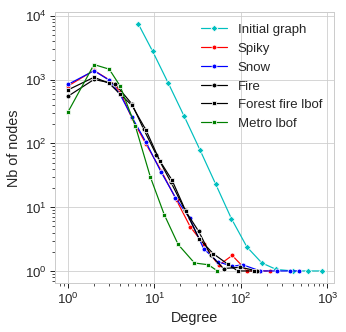

In [114]:
dlist_spiky = test_module.expand_degrees(node_spiky, degree_spiky)
dlist_snow = test_module.expand_degrees(node_snowball, degree_snowball)
dlist_fire = test_module.expand_degrees(node_fire, degree_fire)

density=False

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')
#lin_x,lin_y = test_module.degree_distribution(dlist_spiky, mode='lin')
#plt.scatter(lin_x,lin_y,c='r',marker='x',s=10)

log_x,log_y = test_module.degree_distribution(dlist_full_graph, mode='log',density=density)
sns.lineplot(log_x,log_y,c='c',marker='D',label='Initial graph')

log_x,log_y = test_module.degree_distribution(dlist_spiky, mode='log',density=density)
sns.lineplot(log_x,log_y,c='r',marker='o',label='Spiky')

#lin_x,lin_y = test_module.degree_distribution(dlist_snow, mode='lin')
#plt.scatter(lin_x,lin_y,c='b',marker='x',s=10)
log_x,log_y = test_module.degree_distribution(dlist_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='o',label='Snow')

#log_x,log_y = test_module.degree_distribution(dlist_lbof_snow, mode='log',density=density)
#sns.lineplot(log_x,log_y,c='b',marker='s',label='Snow lbol')

log_x,log_y = test_module.degree_distribution(dlist_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='o',label='Fire')

log_x,log_y = test_module.degree_distribution(dlist_lbof_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='s',label='Forest fire lbof')

log_x,log_y = test_module.degree_distribution(dlist_metro, mode='log',density=density)
line1 = sns.lineplot(log_x,log_y,c='g',marker='s',label='Metro lbof')

#line1.set_dashes([2, 2, 10, 2])

#plt.xlim((1e-4,1e-1))
#plt.ylim((.9,1e4))
plt.xlabel('Degree')
plt.ylabel('Nb of nodes')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distrib'+ graph_type +'.png')

/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:65: RuntimeWarning: invalid value encountered in true_divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] /
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:67: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


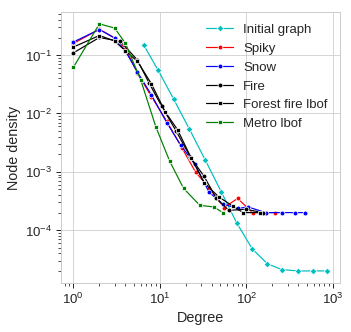

In [115]:

density=True

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

#lin_x,lin_y = test_module.degree_distribution(dlist_spiky, mode='lin')
#plt.scatter(lin_x,lin_y,c='r',marker='x',s=10)

log_x,log_y = test_module.degree_distribution(dlist_full_graph, mode='log',density=density)
sns.lineplot(log_x,log_y,c='c',marker='D',label='Initial graph')

log_x,log_y = test_module.degree_distribution(dlist_spiky, mode='log',density=density)
sns.lineplot(log_x,log_y,c='r',marker='o',label='Spiky')

#lin_x,lin_y = test_module.degree_distribution(dlist_snow, mode='lin')
#plt.scatter(lin_x,lin_y,c='b',marker='x',s=10)
log_x,log_y = test_module.degree_distribution(dlist_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='o',label='Snow')

#log_x,log_y = test_module.degree_distribution(dlist_lbof_snow, mode='log',density=density)
#sns.lineplot(log_x,log_y,c='b',marker='s',label='Snow lbol')

log_x,log_y = test_module.degree_distribution(dlist_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='o',label='Fire')

log_x,log_y = test_module.degree_distribution(dlist_lbof_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='s',label='Forest fire lbof')

log_x,log_y = test_module.degree_distribution(dlist_metro, mode='log',density=density)
sns.lineplot(log_x,log_y,c='g',marker='s',dashes=[2, 2],label='Metro lbof')

#plt.xlim((1e-4,1e-1))
#plt.ylim((.9,1e4))
plt.xlabel('Degree')
plt.ylabel('Node density')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distrib_density'+ graph_type +'.png')